In [429]:
#+++ версия 2020.09.21 инициализация посредством global init()
from importlib import reload

if 'adds' in sys.modules.keys(): 
    del sys.modules['adds'];
    import adds

from adds import * # import adds functions

init()

import sys; 

sys.path.append("settings/")

if 'creds' in sys.modules.keys(): del sys.modules['creds'];

    
import  creds

# print(creds.pg_creds)

ii(dfr,1)

0:00:00.001 ₀╷₀₀╷₀₀.₀₀₁ init()


,1,2,3,4,5,6,7,8,9,10
0,HTML,Path,Struct,__builtins__,__cached__,__doc__,__file__,__loader__,__name__,__package__
1,__spec__,_log,_o,adds,datetime,df_info,dfr,disp,display,draw_l
2,glob,gmtime,grpp,ii,init,isfile,join,l,listdir,math
3,merge_OKVED,np,os,pd,read_rmsp,reload,requests,shutil,sizeof_fmt,start
4,strftime,time,tm,tmpxls,xl_rowcol_to_cell,xlspcl,zipfile,-,-,-


,name,rows,cols,memory,keys


In [398]:
# 2022-04-22 !/usr/bin/env python
# https://www.rabbitmq.com/tutorials/tutorial-three-python.html
# https://www.youtube.com/watch?v=V9DWKbalbWQ

import pika
import sys

host = 'http://178.154.210.28:5671'


connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.exchange_declare(exchange='logs', exchange_type='fanout')

message = ' '.join(sys.argv[1:]) or "info: Hello World!"
message = {
"carNumber":"A999MM000",
"lat": 58.556686,
"lon": 31.27049,
"hdop":0,
"speed":0,
"engine": 1,
"createdAt": 1637045982
}

message = str(message)

channel.basic_publish(exchange='logs', routing_key='', body=message)
print(" [x] Sent %r" % str(message))
connection.close()

 [x] Sent "{'carNumber': 'A999MM000', 'lat': 58.556686, 'lon': 31.27049, 'hdop': 0, 'speed': 0, 'engine': 1, 'createdAt': 1637045982}"


In [399]:
tm()

*** Start at: 16:53:21 ₂₀₂₂₋₀₄₋₂₅  ************************************************************


1650894801.793614

In [ ]:
#!/usr/bin/env python
import pika
import sys

connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.exchange_declare(exchange='logs', exchange_type='fanout')

message = ' '.join(sys.argv[1:]) or "info: Hello World!"
channel.basic_publish(exchange='logs', routing_key='', body=message)
print(" [x] Sent %r" % message)
connection.close()

In [584]:
[10**c for c in [0,1,2,3,4,5] ]

[1, 10, 100, 1000, 10000, 100000]

*** Start at: 16:17:24 ₂₀₂₂₋₀₄₋₂₆  ************************************************************
0:00:17.086 ₀╷₀₀╷₁₇.₀₈₆ [0, 16777216, '>>>>']
0:00:16.551 ₀╷₀₀╷₃₃.₆₃₉ [1, 16777216, '>>>>']
0:00:16.921 ₀╷₀₀╷₅₀.₅₆₀ [2, 16777216, '>>>>']
0:00:17.495 ₀╷₀₁╷₀₈.₀₅₆ [3, 16777216, '>>>>']
0:00:17.122 ₀╷₀₁╷₂₅.₁₇₉ [4, 16777216, '>>>>']
0:00:16.999 ₀╷₀₁╷₄₂.₁₇₈ [5, 16777216, '>>>>']
0:00:17.416 ₀╷₀₁╷₅₉.₅₉₅ [6, 16777216, '>>>>']
*** Start at: 16:19:24 ₂₀₂₂₋₀₄₋₂₆  ************************************************************


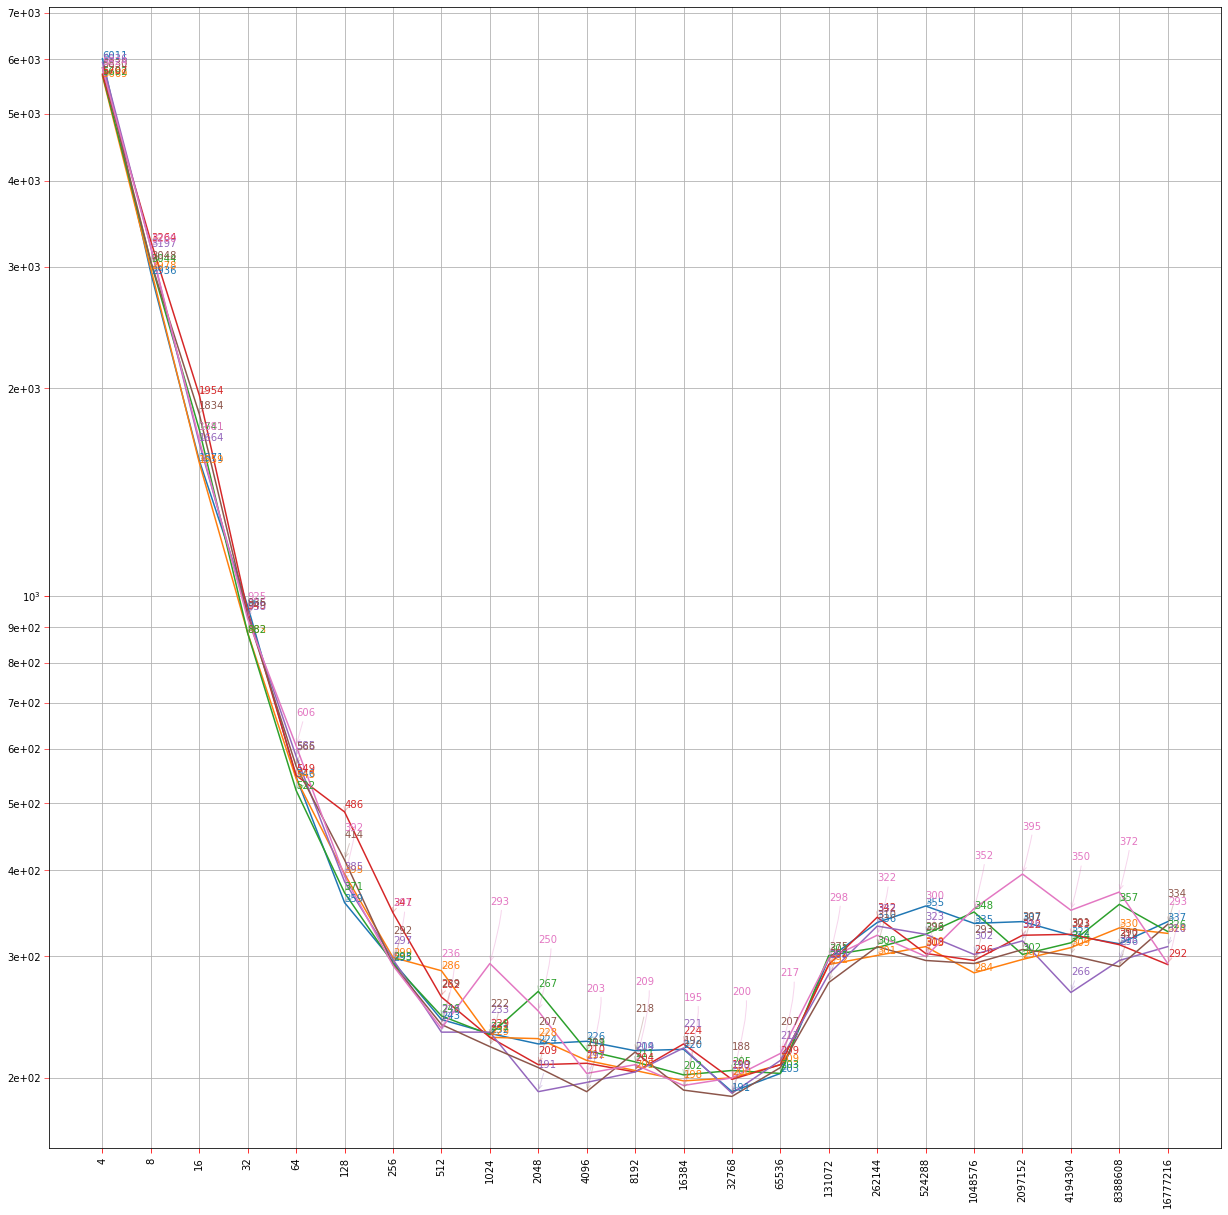

0:00:05.689 ₀╷₀₀╷₀₅.₆₈₉ >>>


1650979169.8723595

In [908]:
# 2022-04-26 Test optimal save
tm()

lbase = 2

row = ""
lap_size = 1
ch_row=[]
ch_lap = time.time()

last=time.time()
fname = 'rabbit.txt'

try: os.remove(fname)
except OSError: pass


for s in range(0,7):
    for ch in [lbase**c for c in range(2, int(50/lbase)) ]:

        for lap in range (0,100000):

            now = time.time()
            row = row + "%s,%s,%s,%s\n"%(lap,int(lap/lap_size), lap_size, (now - last))           
            last = now

            if (lap % ch == 0 ):
                with open(fname, 'a') as file:
                    file.write(row)
                    row = ""

        ch_row = ch_row + [{"step":str(s), "ch":str(ch), "t":(time.time() - ch_lap)*1000} ]
        ch_lap = time.time()


    tm([s,ch,'>>>>'])    


# df = pd.read_csv(fname, names=['lap','save','lap_size','delt'], header=None)


def draw():
    from matplotlib.ticker import FormatStrFormatter
    import math
    
    df = pd.DataFrame(ch_row )
    
    df = df.pivot_table(index=['ch'], columns='step', values='t').reset_index().astype(int).sort_values(['ch'])
    
    x = df['ch'].astype(str)
    
    plt.rcParams['font.size'] = 10
   
    plt.figure(figsize=(21,21))
    ax = plt.gca()
    ax.set_yscale('log')
    ax.yaxis.set_minor_formatter(FormatStrFormatter("%.g"))

    pl = plt.plot(x,df[df.columns[1:]])

    colors =  [c.get_color() for c in pl] 
    
    for i, r in df.iterrows():

        anx = math.log(r['ch'],2) -2  

        for ii,k in enumerate(df.columns[1:]):

            anx = math.log(r['ch'],2) -2  
            ax.annotate("%0.0f"%r[k], (anx, r[k]), xytext= (anx,r[k]+2**ii),
                        color=colors[ii],
                        arrowprops = dict(  arrowstyle="->",
                                        alpha=0.3,
                                        color=colors[ii],
                                        connectionstyle="angle3,angleA=0,angleB=-105"))    

    

    plt.tick_params(which='both', length=5, color='r')
    plt.xticks(rotation=90)
    plt.grid(True,which="both")
    plt.show()
    dfr['t'] = df

tm()    
draw()
tm('>>>')

,t,bar
0,"(-1.0, 0.001]",7
1,"(0.001, 0.01]",36
2,"(0.01, 0.1]",2
3,"(0.1, 1.0]",4


<Figure size 1080x288 with 0 Axes>

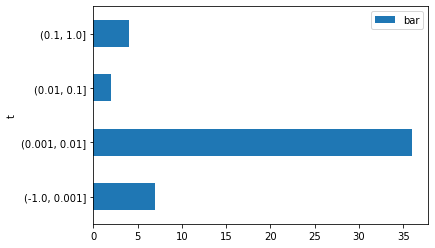

In [497]:
df = dfr['t']
bins = [-1,1e-3,1e-2,1e-1,1]
dfg = df.groupby(pd.cut(df['t'],bins=bins) ).count().rename(columns={'t':'bar'}).reset_index()
disp(dfg)

plt.figure(figsize=(15,4))
dfg.plot.barh(x = 't', y = 'bar')
plt.show()

In [528]:
vlin = {
    '10':10,
    '10':20,
    '20':30
}

vlin['10'] = 5

for k,v in vlin.items():
    print (k,v)

10 5
20 30


In [ ]:
#2022-04-26


import pika
from IPython.display import clear_output

connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.exchange_declare(exchange='mta_trace', exchange_type='fanout')
result = channel.queue_declare(queue='', exclusive=True)
queue_name = result.method.queue


channel.queue_bind(exchange='mta_trace', queue=queue_name)

print(' [*] Waiting for logs. To exit press CTRL+C')

global laps, vlin



def callback(ch, method, properties, body):
    global laps, vlin, chng, old_delay,plot_lap
  
    dj = json.loads(body)
    lap = time.time()
#     print(dj)
    
    if (dj['clear'] == 1 ): 
        laps = []
        vlin = {}

    else:
        row = "%s,%s,$s"%(lap-dj['createdAt'], dj['i'], dj['delay']) 
        
        with open('rabbit.txt', 'a') as file:
            file.write(row)

        laps = laps + [delt]

        df = pd.DataFrame(laps)
        
        if (dj['delay'] != old_delay):
            chng = chng + 1   
        
        old_delay = dj['delay']
        
        vlin[chng] = {'x':len(laps), 'd': "%s - %0.2f"%(dj['delay'],plot_lap)}

        clear_output(wait=True)
        
        plot_lap = time.time()

        plt.figure(figsize=(19,5))
        plt.rcParams["font.size"] = "8"
        plt.plot(df['t'])
        plt.grid()

        for k,v in vlin.items():
            plt.axvline(x=v['x'],ls=':',color='purple')
            plt.text( v['x'], df['t'].max()*1.06 , v['d'] , rotation=90, va='bottom')

        plt.show()
        
        plot_lap = time.time() - plot_lap

        dfr['t'] = df
        

        df.to_pickle('rabbitmq_stats.pcl')


channel.basic_consume(
    queue=queue_name, on_message_callback=callback, auto_ack=True)

channel.start_consuming()


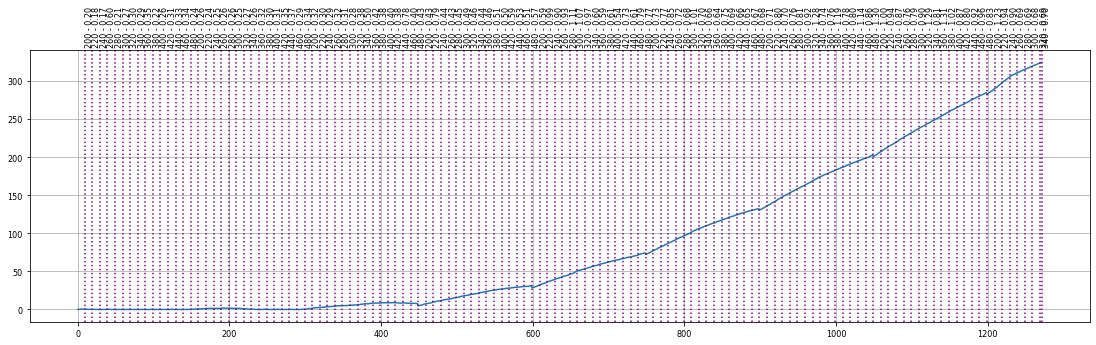

StreamLostError: Stream connection lost: ConnectionResetError(10054, 'Удаленный хост принудительно разорвал существующее подключение', None, 10054, None)

In [556]:
import pika
from IPython.display import clear_output

connection = pika.BlockingConnection(
    pika.ConnectionParameters(host='localhost'))
channel = connection.channel()

channel.exchange_declare(exchange='logs', exchange_type='fanout')

result = channel.queue_declare(queue='', exclusive=True)
queue_name = result.method.queue

channel.queue_bind(exchange='logs', queue=queue_name)

print(' [*] Waiting for logs. To exit press CTRL+C')

global laps, vlin


dfl = pd.DataFrame(laps)
laps = []
vlin = {}
chng = 0
old_delay = 0
plot_lap = 0


def callback(ch, method, properties, body):
    global laps, vlin, chng, old_delay,plot_lap
    

    
    dj = json.loads(body)
    lap = time.time()
#     print(dj)
    
    if (dj['clear'] == 1 ): 
        laps = []
        vlin = {}

    else:
        delt = {'t' : lap-dj['createdAt'], 'i': dj['i'], 'delay': dj['delay'] }

        laps = laps + [delt]

        df = pd.DataFrame(laps)
        
        if (dj['delay'] != old_delay):
            chng = chng + 1   
        
        old_delay = dj['delay']
        
        vlin[chng] = {'x':len(laps), 'd': "%s - %0.2f"%(dj['delay'],plot_lap)}

        clear_output(wait=True)
        
        plot_lap = time.time()

        plt.figure(figsize=(19,5))
        plt.rcParams["font.size"] = "8"
        plt.plot(df['t'])
        plt.grid()

        for k,v in vlin.items():
            plt.axvline(x=v['x'],ls=':',color='purple')
            plt.text( v['x'], df['t'].max()*1.06 , v['d'] , rotation=90, va='bottom')

        plt.show()
        
        plot_lap = time.time() - plot_lap

        dfr['t'] = df
        

        df.to_pickle('rabbitmq_stats.pcl')


channel.basic_consume(
    queue=queue_name, on_message_callback=callback, auto_ack=True)

channel.start_consuming()

In [ ]:
[40, 80, 150, 200, 380, 450, 600][::-1]

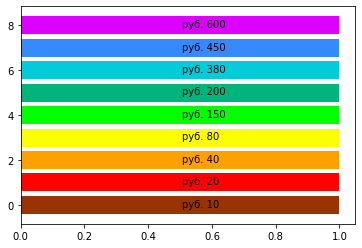

In [201]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

# Wanted palette details

palette = ['#'+c for c in '993402 FE0100 FEA000 FBFF00 03FF00 00B47B 04CBD9 358AFF DC01FE'.split(" ")]

# plt.xlim(0, 10)
plt.barh(range(0,len(palette)), [1] * len(palette), align='center', color=palette)


for i,p in enumerate(palette):

    plt.annotate(
            "руб. " + str([10,20,40, 80, 150, 200, 380, 450, 600, 800,1000][i]),                      # Use `label` as label
            (0.5, i),         # Place label at end of the bar
            xytext=(2, 1),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
    #         ha=ha                       # Horizontally align label differently for
    )
                                        # positive and negative values.

# df = pd.DataFrame(palette)

# ax = df.plot(kind='bar', figsize=(12, 8), title='Amount Frequency',
#              xlabel='Amount ($)', ylabel='Frequency', legend=False)

# # annotate
# ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
# ax.margins(y=0.1)

plt.show()

In [197]:
def colorise(val):
    color = ''+'993402 FE0100 FEA000 FBFF00 03FF00 00B47B 04CBD9 358AFF DC01FE'.split(" ")[[i for i,v in enumerate([10,40, 80, 150, 200, 380, 450, 600]) if v > val][0]]
    return color
    
colorise(149)

'FBFF00'

In [164]:
import glob
import os

for f in glob.glob(r'C:\Users\S.Savinskiy\Downloads\parking*'):
    os.remove(f)


In [351]:

tm()
import simplekml


def Draw_geojson(fname,routes,points):
    kml = simplekml.Kml()
    for df_point in points:
        for i,row in df_point['points'].iterrows():
            pt2 = kml.newpoint(name= row['name'], coords=[(row['Longitude'],row['Latitude'])])
            pt2.style.iconstyle.icon.href = df_point['icon']
#             set color of icon to be cyan (RGB=#00ffff)
            pt2.style.iconstyle.color ='44ff8800' # aabbggrr
    
                                          
    for i,df_route in routes.iterrows(): 
#         print (df_route)
#         route = [tuple(x) for x in df_route['geometry'][['Longitude','Latitude']].values]
        
#         max_price = pd.DataFrame(df_route['periods'])['price'].max()

        lin = kml.newlinestring(name="№%s - %s"% (df_route["number"],df_route['price']), 
#                                 description="%s"% df_route["price_description"]
                               )
        
#         print (df_route['price'])
        lin.style.linestyle.color = simplekml.Color.hex(colorise(df_route['price']))   # Red
        lin.style.linestyle.width= 5  # 10 pixels
#         print (json.loads(df_route['geometry'])['coordinates'])
        
        lin.coords = json.loads(df_route['geometry'])['coordinates']
    kml.save(fname)   


df = dfr['parking_zone'] #[:2]

tm(df.shape[0])

dfs = [y for x, y in df.groupby('price', as_index=False)]
chk_size = 2000
dfss = []

for d in dfs:
    price = d['price'][0:1].values[0]
    if ( d.shape[0] > chk_size):
        for i,n  in enumerate(range(0,  d.shape[0],chk_size)):
            dfss = dfss + [{"n":"%s_%s"%(price,i) ,"df":d[n:n+chk_size]}]
    else: dfss = dfss + [{"n":"%s"%price,"df":d}]


for d in dfss:
    Draw_geojson(r'C:\Users\S.Savinskiy\Downloads\parking_'+d['n']+'.kml',
         d['df'],
         [
         ])
    tm([d['n'],d['df'].shape[0]])
tm('>>>')

*** Start at: 20:43:08 ₂₀₂₂₋₀₄₋₂₂  ************************************************************
0:00:00.000 ₀╷₀₀╷₀₀.₀₀₁ 10366
0:00:02.869 ₀╷₀₀╷₀₂.₈₇₀ ['40_0', 2000]
0:00:02.263 ₀╷₀₀╷₀₅.₁₃₄ ['40_1', 2000]
0:00:00.353 ₀╷₀₀╷₀₅.₄₈₈ ['40_2', 415]
0:00:01.353 ₀╷₀₀╷₀₆.₈₄₄ ['80', 772]
0:00:01.912 ₀╷₀₀╷₀₈.₇₅₈ ['150_0', 2000]
0:00:00.146 ₀╷₀₀╷₀₈.₉₀₄ ['150_1', 168]
0:00:00.008 ₀╷₀₀╷₀₈.₉₁₃ ['200', 11]
0:00:01.736 ₀╷₀₀╷₁₀.₆₅₀ ['380_0', 2000]
0:00:00.409 ₀╷₀₀╷₁₁.₀₅₉ ['380_1', 647]
0:00:00.298 ₀╷₀₀╷₁₁.₃₅₇ ['450', 353]
0:00:00.000 ₀╷₀₀╷₁₁.₃₅₈ >>>


In [208]:
df.groupby(['price']).count()

,id,number,geometry,price_description,weekends,periods
price,,,,,,
40,4415,4415,4415,4415,4415,4415
80,772,772,772,772,772,772
150,2168,2168,2168,2168,2168,2168
200,11,11,11,11,11,11
380,2647,2647,2647,2647,2647,2647
450,353,353,353,353,353,353


In [301]:
ii(dfr)

,name,rows,cols,memory,keys
0,df = dfr['parking_zone'],10366,7,"580,624",7
1,df = dfr['bmo_last_devide_id'],2612,3,"62,816",3


In [306]:
df = dfr['parking_zone']
chk_size = 2000
for i  in range(0,df.shape[0],chk_size):
    print(df[i:i+chk_size].shape[0])

2000
2000
2000
2000
2000
366


In [214]:
df.groupby('price', as_index=False)

In [345]:
dfs = [y for x, y in df.groupby('price', as_index=False)]
chk_size = 2000
dfss = []

for d in dfs:
    price = d['price'][0:1].values[0]
    print (price)
    if ( d.shape[0] > chk_size):
        for i,n  in enumerate(range(0,  d.shape[0],chk_size)):
            dfss = dfss + [{"n":"%s_%s"%(price,i) ,"df":d[n:n+chk_size]}]
    else: dfss = dfss + [{"n":"%s"%price,"df":d}]
for i in dfss:
    print (i['n'])

40
80
150
200
380
450
40_0
40_1
40_2
80
150_0
150_1
200
380_0
380_1
450


In [228]:
df.sort_values(['unixtime'])['unixtime'][0]

1650625635

*** Start at: 13:49:11 ₂₀₂₂₋₀₄₋₂₅  ************************************************************


<BarContainer object of 20 artists>

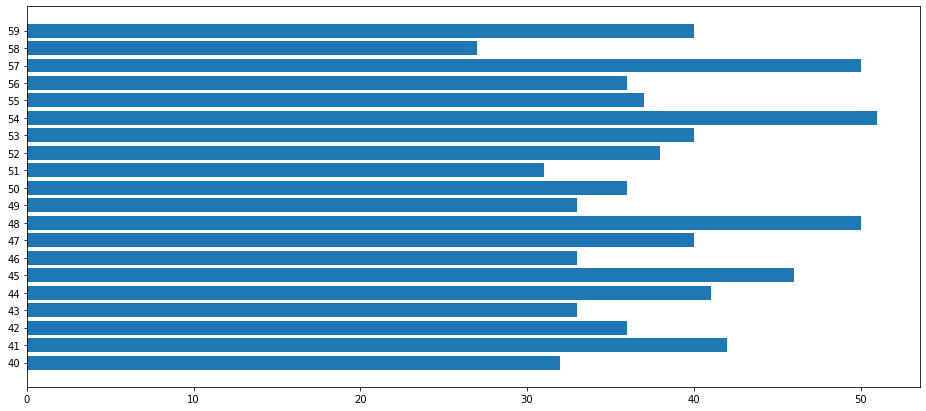

In [366]:
tm()
from datetime import datetime
df = dfr['bmo_last_devide_id'] = pd.read_csv(r'C:\Users\S.Savinskiy\Downloads\bmo_last.csv')

# ts =  df.sort_values(['unixtime'], ascending=False)
# print (ts)
df['iso_time'] = df['unixtime'].apply(lambda x: str(datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')))

df = df[df['unixtime'] > (df['unixtime'].max() - 3600*24*300 )   ]

dfg = df.groupby(df['iso_time'].str[-2:19])['device_id'].count().reset_index()

dfg = dfg.sort_values(['iso_time'])[-20:]

# print(dfg.shape[0],dfg.info())

plt.figure(figsize=(16,7))
plt.barh(dfg['iso_time'],dfg['device_id'])

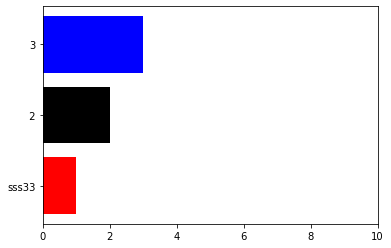

In [258]:
import pylab as plt
plt.xlim(0, 10)
plt.barh(['sss33',' 2', '3'], [1, 2, 3], align='center', color=['#ff0000','#000000','#0000ff'])
plt.show()

In [280]:
dfg

,iso_time,device_id
169,2021-12-28,11
252,2022-04-08,11
262,2022-04-18,13
259,2022-04-15,13
213,2022-02-28,13
115,2021-10-22,15
113,2021-10-19,15
261,2022-04-17,16
256,2022-04-12,16
263,2022-04-19,17


In [352]:
# 2022-04-22 read_parking
import json
data = []
def load_park_zones():
    fname = r'C:\Users\S.Savinskiy\Downloads\response_1650638252002.json'
   
    
    with open(fname,'rb') as f:
        data = json.loads(f.read())
    
    parkings = data['data']   #[:2]
    
#     print (parkings)
    
#     df_nested_list = pd.json_normalize(parkings, record_path =['coordinates'])
    
    return pd.DataFrame(parkings)

dfr['parking_zone'] = df  = load_park_zones()


tm(['>>>>',df.info(),
dfr['parking_zone'].count()
   ])
disp(df[:3])
df.groupby(['price']).count().reset_index()['price'].to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10366 entries, 0 to 10365
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 10366 non-null  int64 
 1   number             10366 non-null  object
 2   geometry           10366 non-null  object
 3   price_description  10366 non-null  object
 4   price              10366 non-null  int64 
 5   weekends           10366 non-null  object
 6   periods            10366 non-null  object
dtypes: int64(2), object(5)
memory usage: 567.0+ KB
0:00:18.382 ₀╷₀₀╷₂₉.₇₄₁ ['>>>>', None, id                   10366
number               10366
geometry             10366
price_description    10366
price                10366
weekends             10366
periods              10366
dtype: int64]


,id,number,geometry,price_description,price,weekends,periods
0,15788,8301,"{""type"":""LineString"",""coordinates"":[[37.596529,55.74753],[37.597243,55.747403]]}","пн-вс, кроме праздников с 8:00 до 21:00: 380 руб/час, с 21:00 до 8:00: 200 руб/час",380,[],"[{'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 1, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 2, 'price_unit': 'RUB'}, {'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 3, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 4, 'price_unit': 'RUB'}, {'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 5, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 6, 'price_unit': 'RUB'}]"
1,21979,0301,"{""type"":""LineString"",""coordinates"":[[37.588611,55.745772],[37.588627,55.745633]]}","пн-вс, кроме праздников с 8:00 до 21:00: 380 руб/час, с 21:00 до 8:00: 200 руб/час",380,[],"[{'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 1, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 2, 'price_unit': 'RUB'}, {'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 3, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 4, 'price_unit': 'RUB'}, {'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 5, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 6, 'price_unit': 'RUB'}]"
2,14980,0304,"{""type"":""LineString"",""coordinates"":[[37.603695,55.762644],[37.604152,55.763096]]}","пн-вс, кроме праздников с 8:00 до 21:00: 380 руб/час, с 21:00 до 8:00: 200 руб/час",380,[],"[{'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 1, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 2, 'price_unit': 'RUB'}, {'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 3, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 4, 'price_unit': 'RUB'}, {'from': 480, 'to': 1260, 'price': 38000, 'duration': None, 'priority': 5, 'price_unit': 'RUB'}, {'from': 1260, 'to': 480, 'price': 20000, 'duration': None, 'priority': 6, 'price_unit': 'RUB'}]"


[40, 80, 150, 200, 380, 450]

In [65]:
pd.DataFrame(df['periods'][0])['price'].max()

38000

In [57]:
ii(dfr,1)

,name,rows,cols,memory,keys
0,df = dfr['parking_zone'],35,7,"2,088","['id', 'number', 'geometry', 'price_description', 'price', 'weekends', 'periods']"


*** Start at: 20:20:05 ₂₀₂₂₋₀₄₋₂₁  ************************************************************

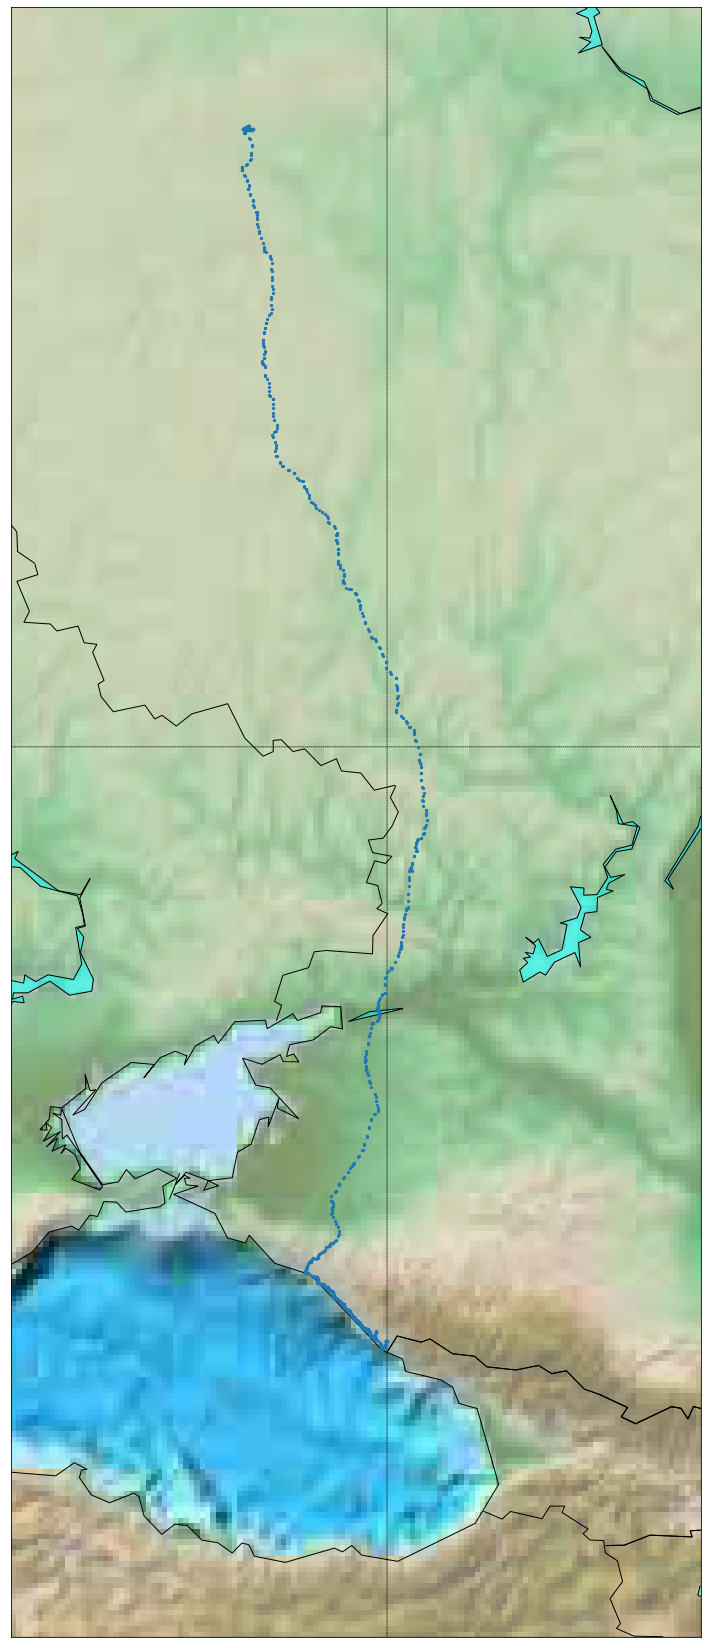

0:00:02.717 ₀╷₀₀╷₀₂.₇₁₇ >>>


In [166]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# plt.imshow((out * 255).astype(np.uint8))
tm()

plt.figure(figsize=(15,30))
x1 = 34.
x2 = 45.

m = Basemap(resolution='l',projection='merc',
            width=12000000,height=9000000,
            llcrnrlat=40.,
            urcrnrlat=57.,
            llcrnrlon=34.,
            urcrnrlon=45.,
            lat_ts=(x1+x2)/2)

# m.bluemarble()
m.etopo()

# m.etopo(scale=0.9, alpha=0.7)

# m.scatter(lon,lat,300)

x1,y1 = m(37.35,55.7)
x2,y2 = m(37.35,55.2)


df = dfr['route_574'][::10]

# df[['my','mx']] = df.apply(lambda x: m(x['lat'],x['lng']), axis=1).apply(pd.Series)


x,y = m(df.lng.tolist(), df.lat.tolist())

# x = (x1,x2)
# y = (y1,y2)

m.drawcoastlines(linewidth=1)
m.drawcountries(linewidth=1)
m.fillcontinents(color='lightgray',lake_color='aqua',alpha=0.5)
m.drawmeridians(np.arange(0,360,10))
m.drawparallels(np.arange(-90,90,10))
# m.drawmapscale(33,35,0,40,1000,barstyle='fancy')
m.scatter(x,y,5,zorder=11)
# plt.text(x,y,"Skolkovo",color='red',size=14);
plt.show()
tm('>>>')

In [34]:
# 2022-04-16 https://developers.google.com/kml/documentation/kmlreference
# https://kml4earth.appspot.com/icons.html
# https://icons8.com/icon/set/atransport/color
# hotel - https://img.icons8.com/office/32/hotel-information.png
# gas station https://img.icons8.com/color/32/gas-station.png

tm()
import simplekml


def Draw(fname,routes,points):
    kml = simplekml.Kml()
    for df_point in points:
        for i,row in df_point['points'].iterrows():
            pt2 = kml.newpoint(name= row['name'], coords=[(row['Longitude'],row['Latitude'])])
            pt2.style.iconstyle.icon.href = df_point['icon']
#             set color of icon to be cyan (RGB=#00ffff)
            pt2.style.iconstyle.color ='44ff8800' # aabbggrr
    
                                          
    for df_route in routes:                                      
        route = [tuple(x) for x in df_route['route'][['Longitude','Latitude']].values]

        lin = kml.newlinestring(name=df_route["name"])
        lin.style.linestyle.color = '228800ff'  # Red
        lin.style.linestyle.width= 5  # 10 pixels
        lin.coords = route
    kml.save(fname)    



*** Start at: 13:25:26 ₂₀₂₂₋₀₄₋₂₂  ************************************************************


In [6]:
tm()
db = client["tourservice"]
qwr = {"$and":[{"category":"EAT/DRINK"}, {"subcategory": "CAFE"} , 
               {"location": {"$near": {"$maxDistance":1000, 
                                     "$geometry":{"type":"Point", 
                                                  "coordinates":[37.35,55.7]}}}}]}

qwr_loc = [{"location": {"$near": {"$maxDistance":1000, 
                                     "$geometry":{"type":"MultiPoint", 
                                                  "coordinates":[37.35,55.7]}}}},
            {"location": {"$near": {"$maxDistance":1000, 
                                     "$geometry":{"type":"MultiPoint", 
                                                  "coordinates":[37.36,55.7]}}}}]


qwr_loc = {
        "location" : {
                "type" : "Point",
                "coordinates" : [
                        37.35,
                        55.7
                ]
        },
        "distance" : 1000
}

qwr = {"$and":[{"category":"EAT/DRINK"}, {"subcategory": "CAFE"}, qwr_loc] }

# qwr = {"name":"Десяточка"}


bd_find = db.poi_gson.find(qwr)

db_find = db.poi_gson.aggregate([
    { "$geoNear": {
        "near": {
            "type": "Point",
            "coordinates": [
               37.35,
               55.7
            ]
        },
        "maxDistance": 2000,
        "spherical": True,
        "distanceField": "distance"
    }}
])


df = pd.DataFrame(list(db_find))


    
tm(['>>>>',df.count()])
df

NameError: name 'tm' is not defined

In [9]:
df[:5]

""


In [145]:
tm()

coll  = db.poi_gson

coll.drop()

coll  = db.poi_gson

for element in db.poi.find().limit(20000): 
    coll.insert_many([{
        "_id": element["_id"],
        "name": element["name"],
        "category": element["category"],
        "subcategory": element["subcategory"],
        "loc": element["lng"], element["lat"]]
        
        }}]);

tm('>>>>>')

*** Start at: 19:08:40 ₂₀₂₂₋₀₄₋₁₉  ************************************************************
0:00:11.649 ₀╷₀₀╷₁₁.₆₄₉ >>>>>


In [96]:
tm()

coll  = db.poi_gson
coll.drop()

ins = []

els = db.poi.find().limit(40000)

tm('1. get els')

for element in els: 
    ins = ins + [{
        "_id": element["_id"],
        "name": element["name"],
        "category": element["category"],
        "subcategory": element["subcategory"],
        "loc": {
            "type": "Point",
            "coordinates": [element["lng"], element["lat"]]
        
        }}]

tm(['1. list ready',len(str(ins))])

coll.insert_many(ins)

tm(['>>>>>'])

*** Start at: 16:52:43 ₂₀₂₂₋₀₄₋₁₉  ************************************************************
0:00:00.024 ₀╷₀₀╷₀₀.₀₂₄ 1. get els
0:00:14.715 ₀╷₀₀╷₁₄.₇₃₉ ['1. list ready', 7675403]
0:00:00.924 ₀╷₀₀╷₁₅.₆₆₄ ['>>>>>']


In [107]:
ii(dfr,1)

,name,rows,cols,memory,keys
0,df = dfr['route_574'],13536,6,"758,016","['lat', 'lng', 'unixtime', 'isotime', 'fuel', 'speed']"
1,df = dfr['osm poi'],1166350,6,"55,984,928","['id', 'name', 'category', 'subcategory', 'lng', 'lat']"
2,df = dfr['poi_accomodation'],34,4,"1,216","['Latitude', 'Longitude', 'name', 'subcategory']"


In [303]:
#2022-04-05 расчет дистанции 

import math


def geo_shift(p, dist):
    
    cos_d = math.cos( p[1]  * math.pi/180 )

    lat_delt = dist / 110.574 / 1000
    lng_delt = dist / 111.320 / 1000 /cos_d


    return [lng_delt, 
            lat_delt, 
            p[0] + lng_delt, 
            p[1] + lat_delt,
            p[0] - lng_delt, 
            p[1] - lat_delt
           ]



def f_distance(lat1, lon1, lat2, lon2, unit) :
    if ((lat1 == lat2) & (lon1 == lon2)):
        return 0

    else:
        radlat1 = math.pi * lat1/180;
        radlat2 = math.pi * lat2/180;
        theta = lon1-lon2;
        radtheta = math.pi * theta/180;
        dist = math.sin(radlat1) * math.sin(radlat2) + math.cos(radlat1) * math.cos(radlat2) * math.cos(radtheta);
        if (dist > 1) :
            dist = 1;
        
        dist = math.acos(dist);
        dist = dist * 180/math.pi;
        dist = dist * 60 * 1.1515;
        if unit=="K": dist = dist * 1.609344 
        if unit=="N": dist = dist * 0.8684 
        return dist;

gs = geo_shift([37.40, 55.7], 3000)
print ( '%s,%s\n%s,%s' % tuple(gs[2:]))
    
f_distance(55.1,37.20, 55.2,37.3,"K" )

37.44782269657372,55.727131151988715
37.352177303426274,55.67286884801129


12.806276228290576

In [487]:
# 2022-04-08 POI to local PG

def db_sql(sqls):
    conn = psycopg2.connect(connection_string)

    conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT);

    print("Database opened successfully")
    curs = conn.cursor();

     #drop_database, create_database, 


    for sql in sqls:
        try:
            curs.execute(sql)
            # NB : you won't get an IntegrityError when reading
        except Exception as ex:
            print(ex, sql)
            
    tm('init db')


    conn.close()
    
sql_database_info =  '''select t1.datname AS db_name,  
                    pg_size_pretty(pg_database_size(t1.datname)) as db_size
                    from pg_database t1
                    order by pg_database_size(t1.datname) desc;'''


create_poi_table = '''DROP TABLE IF EXISTS POI; CREATE TABLE POI (
    ID  varchar(255) PRIMARY KEY,
    CATEGORY varchar(32),
    SUBCATEGORY varchar(32),
    MAME varchar(128),
    LON varchar(32),
    LAT varchar(32),
    LON_F float,
    LAT_F float,
    LON_I int,
    LAT_I int
);'''

create_route_table = '''DROP TABLE IF EXISTS ROUTE; CREATE TABLE ROUTE (
    ID  varchar(255) PRIMARY KEY,
    ROUTE_NAME varchar(255),
    UNIXTIME varchar(255),
    LON varchar(255),
    LAT varchar(255),
    iso_time varchar(64),
    FUEL float,
    SPEED int
);'''    
    

sqls = [create_route_table]    

tm()
db_sql(sqls)
tm('>>>')

*** Start at: 10:56:26 ₂₀₂₂₋₀₄₋₁₂  ************************************************************
0:00:00.000 ₀╷₀₀╷₀₀.₀₀₀ >>>


In [ ]:

# 2022-04-08  read_csv to_sql from file by chunk *******************


from sqlalchemy import create_engine

cols = ['Unnamed: 0', 'ID', 'NAME', 'CATEGORY', 'SUBCATEGORY', 'LON', 'LAT',
       'SRID', 'WKT', 'INTERNATIONAL_NAME', 'STREET', 'WIKIPEDIA', 'PHONE',
       'CITY', 'EMAIL', 'ALTERNATIVE_NAME', 'OPENING_HOURS', 'DESCRIPTION',
       'WEBSITE', 'LAST_UPDATE', 'OPERATOR', 'POSTCODE', 'COUNTRY', 'FAX',
       'IMAGE', 'HOUSENUMBER', 'OTHER_TAGS']

tm()

fname = r'C:\_dev\jupyter_notebook\jnlab\prj\poi\2021-12-18\russia_poi\russia_poi.csv'

columns = { 'ID':'id',
            'NAME':'name',
            'CATEGORY':'category',
            'SUBCATEGORY':'subcategory',
            'LON':'lng',
            'LAT':'lat'
          }

# usecols=columns, 

df = pd.read_csv(fname, sep='|', usecols=columns.keys(),  nrows = 10000000 )

dfr['osm poi'] = df = df.rename(columns=columns)

tm(['1. read poi', df.count()])


engine = create_engine()

dflap = pd.DataFrame(columns=['chunk','t','lap'])


tm('2. start insert')

for lap in range(0,1):
    dflist = []
    
    for chs in range(10,11):
        start_lap = time.time()
        df.to_sql("poi", engine, if_exists='replace', chunksize = 2**chs)
        tm(['3. end insert', chs])
        delt_lap = time.time() - start_lap 
        dflap.loc[len(dflap)] = [chs,delt_lap,lap]
    
    df_out = (dflap.pivot_table(index=['chunk'], columns='lap', values='t')
                .rename_axis(columns=None)
             ).reset_index()


    df_out.loc[:, df_out.columns != 'chunk'].plot(figsize=(10,7))
    plt.show()

tm('3. insert finished')


ix_poi_lat = '''CREATE INDEX ix_poi_lat
    ON public.poi USING btree
    (lat ASC NULLS LAST)
    TABLESPACE pg_default;'''

ix_poi_lng = '''CREATE INDEX ix_poi_lng
    ON public.poi USING btree
    (lng ASC NULLS LAST)
    TABLESPACE pg_default;'''

db_sql([ix_poi_lat,ix_poi_lng])
    
    
tm('>>>')



*** Start at: 23:06:19 ₂₀₂₂₋₀₄₋₁₄  ************************************************************
0:00:09.585 ₀╷₀₀╷₀₉.₅₈₅ ['1. read poi', id             1166350
name           1166350
category       1166350
subcategory    1166350
lng            1166350
lat            1166350
dtype: int64]
0:00:00.002 ₀╷₀₀╷₀₉.₅₈₇ 2. start insert
